## Bike Sharing Demand Prediction - EDA

#### 1 - Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
#warnings.warnings("ignore")

from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from statsmodels.tsa.seasonal import seasonal_decompose
import holidays

#### 2 - Data Collection

In [2]:
# Load dataset
path = "F:\Projects EDA\Datasets\hour.csv"
hour_df = pd.read_csv(path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 3 - EDA

In [4]:
# 3.1 - Basic Statistics
print("Dataset Shape: ", hour_df.shape)
print("\nData Information: ", hour_df.info())
print("\nSummary Statistics: ", display(hour_df.describe(include='all')))

Dataset Shape:  (17379, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

Data Information:  N

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000



Summary Statistics:  None


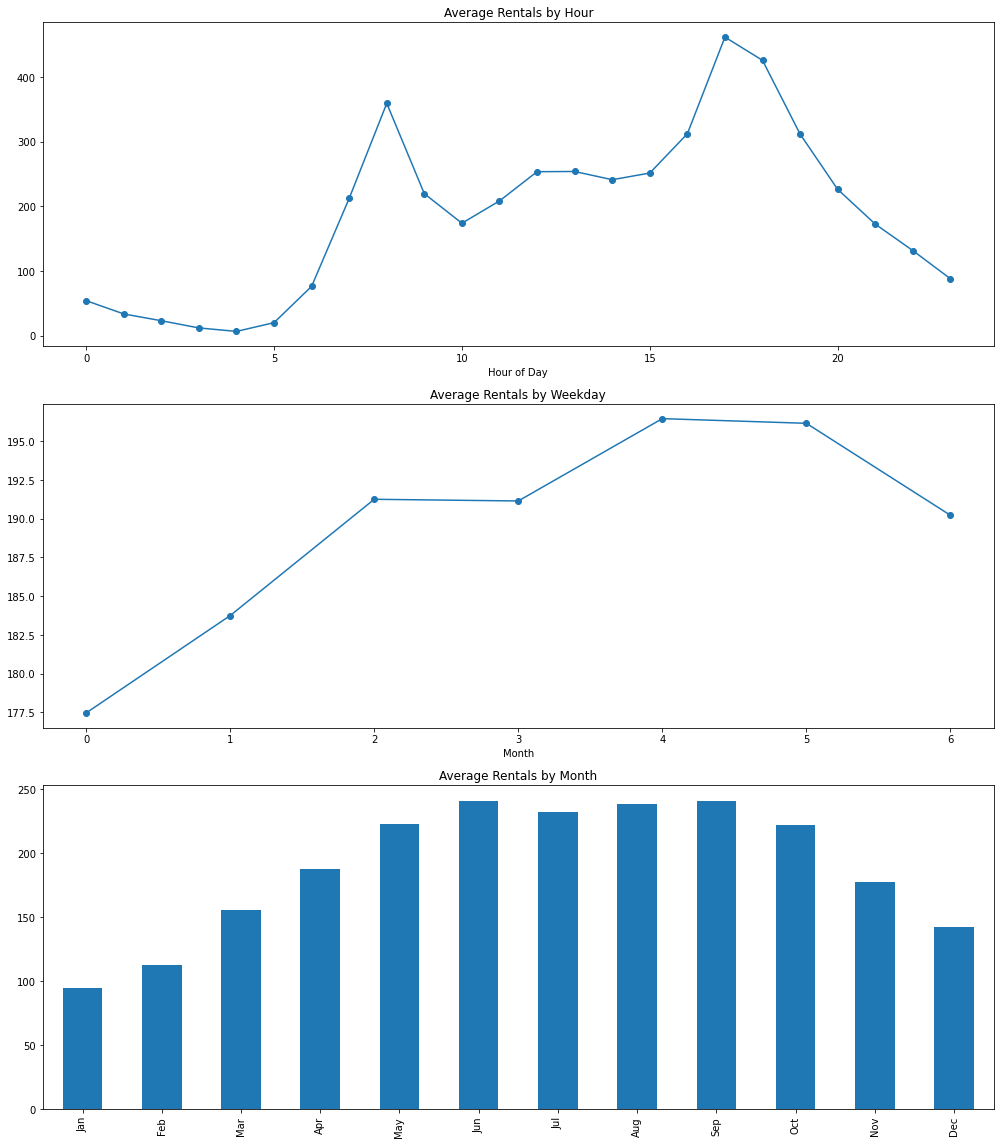

In [5]:
# 3.2 - Temporal patterns
fig, axes = plt.subplots(3,1, figsize=(14,16))

# Daily pattern
hour_df.groupby("hr")['cnt'].mean().plot(ax=axes[0], marker='o')
axes[0].set_title('Average Rentals by Hour')
axes[0].set_xlabel('Hour of Day')

# Weekly pattern
hour_df.groupby("weekday")['cnt'].mean().plot(ax=axes[1], marker='o')
axes[1].set_title('Average Rentals by Weekday')
axes[1].set_xlabel('Day of Week (0=Sun)')

# Monthly pattern
monthly = hour_df.groupby("mnth")['cnt'].mean()
monthly.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly.plot(ax=axes[2], kind='bar')
axes[2].set_title('Average Rentals by Month')
axes[1].set_xlabel('Month')

plt.tight_layout()
plt.show()

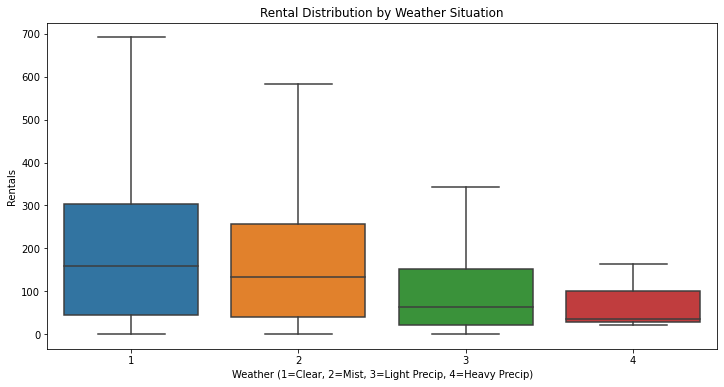

In [6]:
# 3.3 - Weather Impact
plt.figure(figsize=(12,6))
sns.boxplot(x='weathersit', y='cnt', data=hour_df, showfliers=False)
plt.title("Rental Distribution by Weather Situation")
plt.xlabel("Weather (1=Clear, 2=Mist, 3=Light Precip, 4=Heavy Precip)")
plt.ylabel("Rentals")
plt.show()

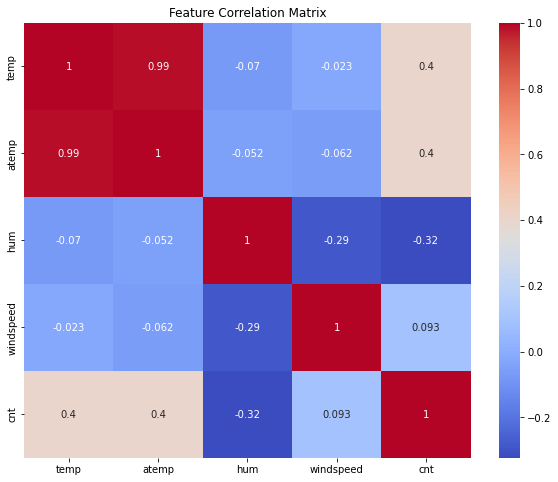

In [22]:
# 3.4 - Correlation Matrix Analysis
corr_matrix = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

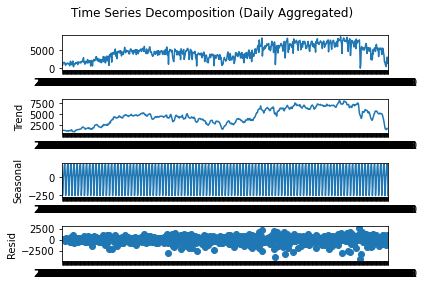

In [8]:
# 3.5 - Time Series Decomposition 
daily_df = hour_df.groupby('dteday').agg({'cnt':'sum'})
decomposition = seasonal_decompose(daily_df, period=7, model='additive')
decomposition.plot()
plt.suptitle('Time Series Decomposition (Daily Aggregated)')
plt.tight_layout()
plt.show()

#### 4 - Feature Engineering & Preprocessing

In [23]:
# 4.1 - Feature Engineering
def engineer_features(df):
    df['dteday'] = pd.to_datetime(df['dteday'])
        
    # Time based features
    df['hour_sin'] = np.sin(2 * np.pi * df['hr']/24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hr']/24)
    df['day_sin'] = np.sin(2 * np.pi * df['weekday']/7)
    df['day_cos'] = np.cos(2 * np.pi * df['weekday']/7)
        
    # Holiday features
    us_holidays = holidays.US(years=[2011, 2012])
    df['is_holiday'] = df['dteday'].apply(lambda x: x in us_holidays).astype(int)
        
    # Weather groupings
    df['bad_weather'] = (df['weathersit'] >= 3).astype(int)
        
    # Temperature features
    df['temp_squared'] = df['temp'] ** 2
    df['feels_like_diff'] = df['atemp'] - df['temp']
        
    # Time since last participation (simulated)
    np.random.seed(42)
    df['hours_since_rain'] = np.random.randint(1, 72, size=len(df))
        
    return df
    
hour_df = engineer_features(hour_df)

In [24]:
hour_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos', 'is_holiday', 'bad_weather', 'temp_squared',
       'feels_like_diff', 'hours_since_rain'],
      dtype='object')

In [25]:
# 4.2 - Define Features & Target
features = ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos']
target = 'cnt'

X = hour_df[features]
y = hour_df[target]

In [26]:
# 4.3 - Preprocessing Pipeline
numeric_features = ['temp', 'atemp', 'hum', 'windspeed', 'temp_squared', 
                    'feels_like_diff', 'hours_since_rain', 
                    'hour_sin', 'hour_cos', 'day_sin', 'day_cos']
categorical_features = ['season', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'is_holiday', 'bad_weather']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [27]:
# 4.4 - Time-based train-test-split
# Sort by date first
hour_df = hour_df.sort_values('dteday')
split_date = '2012-07-01'
train = hour_df[hour_df['dteday'] < split_date]
test = hour_df[hour_df['dteday'] >= split_date]

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")
print(f"Train period: {train['dteday'].min().date()} to {train['dteday'].max().date()}")
print(f"Test period: {test['dteday'].min().date()} to {test['dteday'].max().date()}")


Train size: 13003, Test size: 4376
Train period: 2011-01-01 to 2012-06-30
Test period: 2012-07-01 to 2012-12-31
